# PCA  (analisis de componente principal)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
# normalizacion

data=data.drop(columns=['target_class'])

In [7]:
data_rescaled_mano=(data-np.mean(data))/np.std(data)
data_rescaled_s=StandardScaler().fit_transform(data)

np.sum(data_rescaled_mano-data_rescaled_s)

 Mean of the integrated profile                  0.000000e+00
 Standard deviation of the integrated profile   -1.115067e-10
 Excess kurtosis of the integrated profile      -3.456999e-11
 Skewness of the integrated profile             -7.172045e-12
 Mean of the DM-SNR curve                        1.174245e-11
 Standard deviation of the DM-SNR curve         -9.144349e-11
 Excess kurtosis of the DM-SNR curve             2.822222e-11
 Skewness of the DM-SNR curve                    1.180685e-11
dtype: float64

In [9]:
data_rescaled_mano=(data-np.min(data))/(np.max(data)-np.min(data))
data_rescaled_m=MinMaxScaler().fit_transform(data)

np.sum(data_rescaled_mano-data_rescaled_m)

 Mean of the integrated profile                  1.568736e-13
 Standard deviation of the integrated profile    5.605374e-14
 Excess kurtosis of the integrated profile       1.882314e-13
 Skewness of the integrated profile              2.829209e-14
 Mean of the DM-SNR curve                        1.212409e-13
 Standard deviation of the DM-SNR curve          4.598752e-14
 Excess kurtosis of the DM-SNR curve            -2.881462e-13
 Skewness of the DM-SNR curve                    6.918713e-14
dtype: float64

In [10]:
data=StandardScaler().fit_transform(data)

In [13]:
pca=PCA()
pca.fit(data)
pca.explained_variance_ratio_

array([0.51675584, 0.26807564, 0.10116862, 0.0571781 , 0.03227836,
       0.01998491, 0.00255524, 0.00200328])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


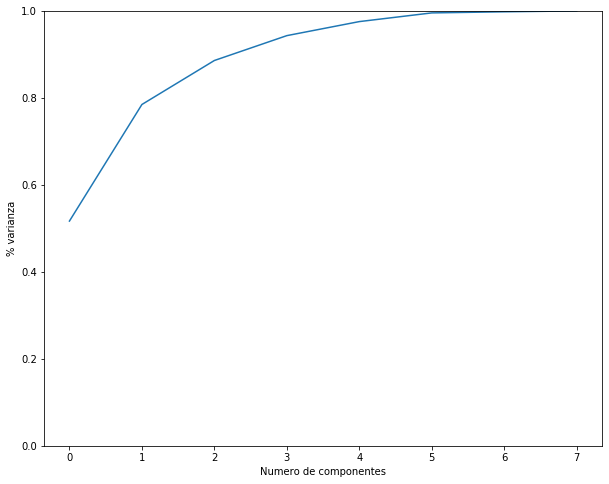

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('% varianza')
plt.ylim([0,1])
plt.show();

In [27]:
pca=PCA(n_components=4)
df=pd.DataFrame(pca.fit_transform(data))
df.head()

,0,1,2,3
0,-1.278849,-1.273133,0.016213,0.662102
1,-1.020553,-0.201162,0.670478,1.605779
2,0.188289,0.432114,-0.979766,-0.519232
3,-1.015466,-1.469881,-0.018832,0.938386
4,-0.822626,2.123651,0.407953,-0.380922


In [28]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [29]:
pd.DataFrame(pca.inverse_transform(df))

,0,1,2,3,4,5,6,7
0,0.726963,1.327427,-0.735075,-0.783587,-0.337221,-0.257022,-0.070554,-0.255592
1,-0.038332,1.811110,0.059444,-0.129622,-0.454226,-0.587282,0.417421,0.287539
2,-0.059363,-1.046436,-0.031402,0.033576,-0.428290,-0.159977,-0.140189,-0.349821
3,0.623153,1.549935,-0.607552,-0.691777,-0.309245,-0.172273,-0.269003,-0.486495
4,-0.366730,-0.849173,0.255278,0.285361,-0.451494,-0.797759,1.303397,1.398872
...,...,...,...,...,...,...,...,...
17893,0.650213,1.919780,-0.659565,-0.741024,-0.226992,-0.881246,1.506225,1.708809
17894,0.396937,0.407380,-0.320539,-0.304422,0.397700,0.684679,-1.049546,-1.109075
17895,0.449061,1.911096,-0.247702,-0.344586,0.849042,0.981183,-1.268849,-1.191775
17896,0.181944,1.079722,-0.204666,-0.298045,-0.457402,-0.537469,0.415628,0.290026


# ICA (analisis de componente independiente)

In [30]:
# el problema de la fiesta

from scipy import signal
from sklearn.decomposition import FastICA

In [31]:
time=np.linspace(0, 8, 2000)

s1=np.sin(2*time)
s2=np.sign(np.sin(3*time))
s3=signal.sawtooth(2*np.pi*time)

In [32]:
S=np.c_[s1, s2, s3]
S+=0.2*np.random.normal(size=S.shape)
S/=S.std(axis=0)

In [34]:
A=np.array([[1,1,1], [0.5, 2, 1], [1.5, 1, 2]])
X=np.dot(S, A.T)  # observaciones

In [35]:
ica=FastICA(n_components=3)
S_ica=ica.fit_transform(X)
A_ica=ica.mixing_

In [36]:
pca=PCA(n_components=3)

S_pca=pca.fit_transform(X)

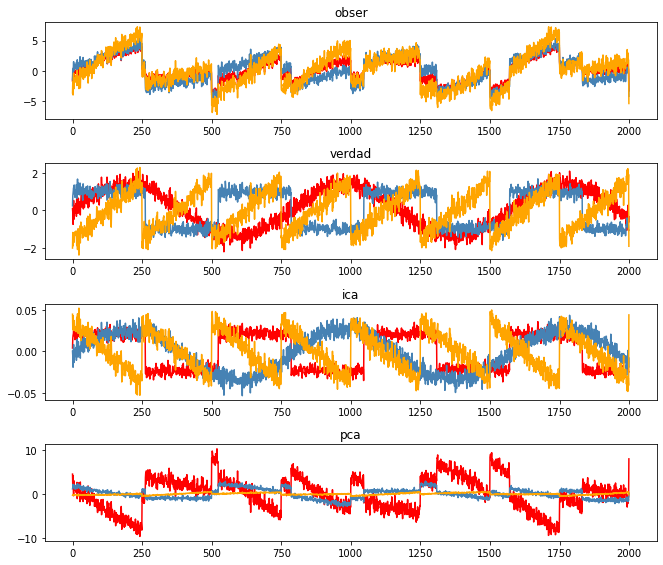

In [38]:
plt.figure(figsize=(10, 8))

modelos=[X, S, S_ica, S_pca]

nombres=['obser', 'verdad', 'ica', 'pca']

colores=['red', 'steelblue', 'orange']

for i,(m, n) in enumerate(zip(modelos, nombres), 1):
    plt.subplot(4, 1, i)
    plt.title(n)
    
    for sig, c in zip(m.T, colores):
        plt.plot(sig, color=c)
        
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)

plt.show();

# UMAP (uniform manifold aprox and projection)

In [39]:
import umap
import seaborn as sns
from sklearn.datasets import load_iris

In [41]:
load_iris().data.shape

(150, 4)

In [44]:
load_iris().target.shape

(150,)

In [45]:
redu=umap.UMAP(n_components=2).fit_transform(load_iris().data)
redu.shape

/Users/data/Library/Python/3.7/lib/python/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

Text(0.5, 1.0, 'Proyaccion UMAP')

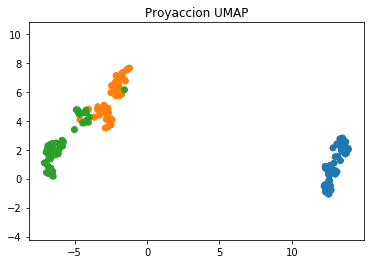

In [46]:
plt.scatter(redu[:,0], redu[:,1], c=[sns.color_palette()[x] for x in load_iris().target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyaccion UMAP')